In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy.stats import binom


https://data.gov.ie/dataset/a8e90f64-ddd1-4c29-97f4-dbabac4b0bee/resource/ada656d9-f9d4-4dfb-9049-62a3a526934a
https://data.gov.ie/dataset/general-election-of-may-2007-general-statistics

In [2]:

#df=pd.read_csv("https://data.gov.ie/dataset/a507b5ef-913f-44f9-8e54-1a06e149825f/resource/81dede99-00bf-4fde-af2e-77244ab27404/download/beef_dairy_report_ded_2020.csv")
df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 200)
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']


refine dataset down to rows county is Galway

In [3]:
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']

year column is int 64 bit

In [4]:
df1['SensorTimestamp']


0      11/08/2015 14:54:33
1      11/08/2015 14:54:42
2      11/08/2015 14:56:59
3      13/08/2015 10:50:11
4      13/08/2015 12:02:42
              ...         
195    14/08/2015 18:06:49
196    14/08/2015 18:11:49
197    14/08/2015 18:16:50
198    14/08/2015 18:21:50
199    14/08/2015 18:26:51
Name: SensorTimestamp, Length: 200, dtype: object

adding a new varaible called datetime

In [5]:
pd.to_datetime(df1['SensorTimestamp'])

0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
195   2015-08-14 18:06:49
196   2015-08-14 18:11:49
197   2015-08-14 18:16:50
198   2015-08-14 18:21:50
199   2015-08-14 18:26:51
Name: SensorTimestamp, Length: 200, dtype: datetime64[ns]

new variable datetime added

In [6]:
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])


In [7]:
df1['datetime']


0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
195   2015-08-14 18:06:49
196   2015-08-14 18:11:49
197   2015-08-14 18:16:50
198   2015-08-14 18:21:50
199   2015-08-14 18:26:51
Name: datetime, Length: 200, dtype: datetime64[ns]

In [8]:
df1

,SensorTimestamp,Longitude,Latitude,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Direction (Degrees True),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars),datetime
0,11/08/2015 14:54:33,-9.261322,53.227482,11.7,30.1974,247.8,243.0,9.9,5.1,1022.6,2015-11-08 14:54:33
1,11/08/2015 14:54:42,-9.261322,53.227482,11.9,30.2003,247.8,243.0,11.1,5.7,1022.7,2015-11-08 14:54:42
2,11/08/2015 14:56:59,-9.261322,53.227482,11.9,30.2003,257.1,252.3,11.7,6.0,1022.7,2015-11-08 14:56:59
3,13/08/2015 10:50:11,-9.261315,53.227482,15.1,30.0911,173.7,168.9,6.5,3.3,1019.0,2015-08-13 10:50:11
4,13/08/2015 12:02:42,-9.261315,53.227482,11.4,30.0645,258.1,253.3,10.1,5.2,1018.1,2015-08-13 12:02:42
...,...,...,...,...,...,...,...,...,...,...,...
195,14/08/2015 18:06:49,-9.261315,53.227482,10.3,29.8460,292.5,287.7,5.7,2.9,1010.7,2015-08-14 18:06:49
196,14/08/2015 18:11:49,-9.261315,53.227482,10.4,29.8430,295.6,290.8,16.3,8.4,1010.6,2015-08-14 18:11:49
197,14/08/2015 18:16:50,-9.261323,53.227482,10.3,29.8460,277.8,273.0,14.5,7.5,1010.7,2015-08-14 18:16:50
198,14/08/2015 18:21:50,-9.261320,53.227482,10.6,29.8430,286.9,282.1,14.1,7.3,1010.6,2015-08-14 18:21:50


In [9]:
df1.describe()

,Longitude,Latitude,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Direction (Degrees True),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars)
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-9.261312,53.227489,11.18700,29.912964,257.383000,252.583000,13.897500,7.149500,1012.969000
std,0.000014,0.000012,0.56952,0.090481,19.105781,19.105781,4.403898,2.267467,3.064063
min,-9.261369,53.227459,9.50000,29.828200,173.700000,168.900000,2.300000,1.200000,1010.100000
25%,-9.261319,53.227482,10.80000,29.843000,244.900000,240.100000,11.950000,6.175000,1010.600000
50%,-9.261312,53.227489,11.00000,29.853350,255.800000,251.000000,14.500000,7.500000,1010.950000
75%,-9.261302,53.227497,11.70000,29.993600,270.450000,265.650000,16.600000,8.500000,1015.700000
max,-9.261287,53.227516,15.10000,30.200300,297.900000,293.100000,23.300000,12.000000,1022.700000


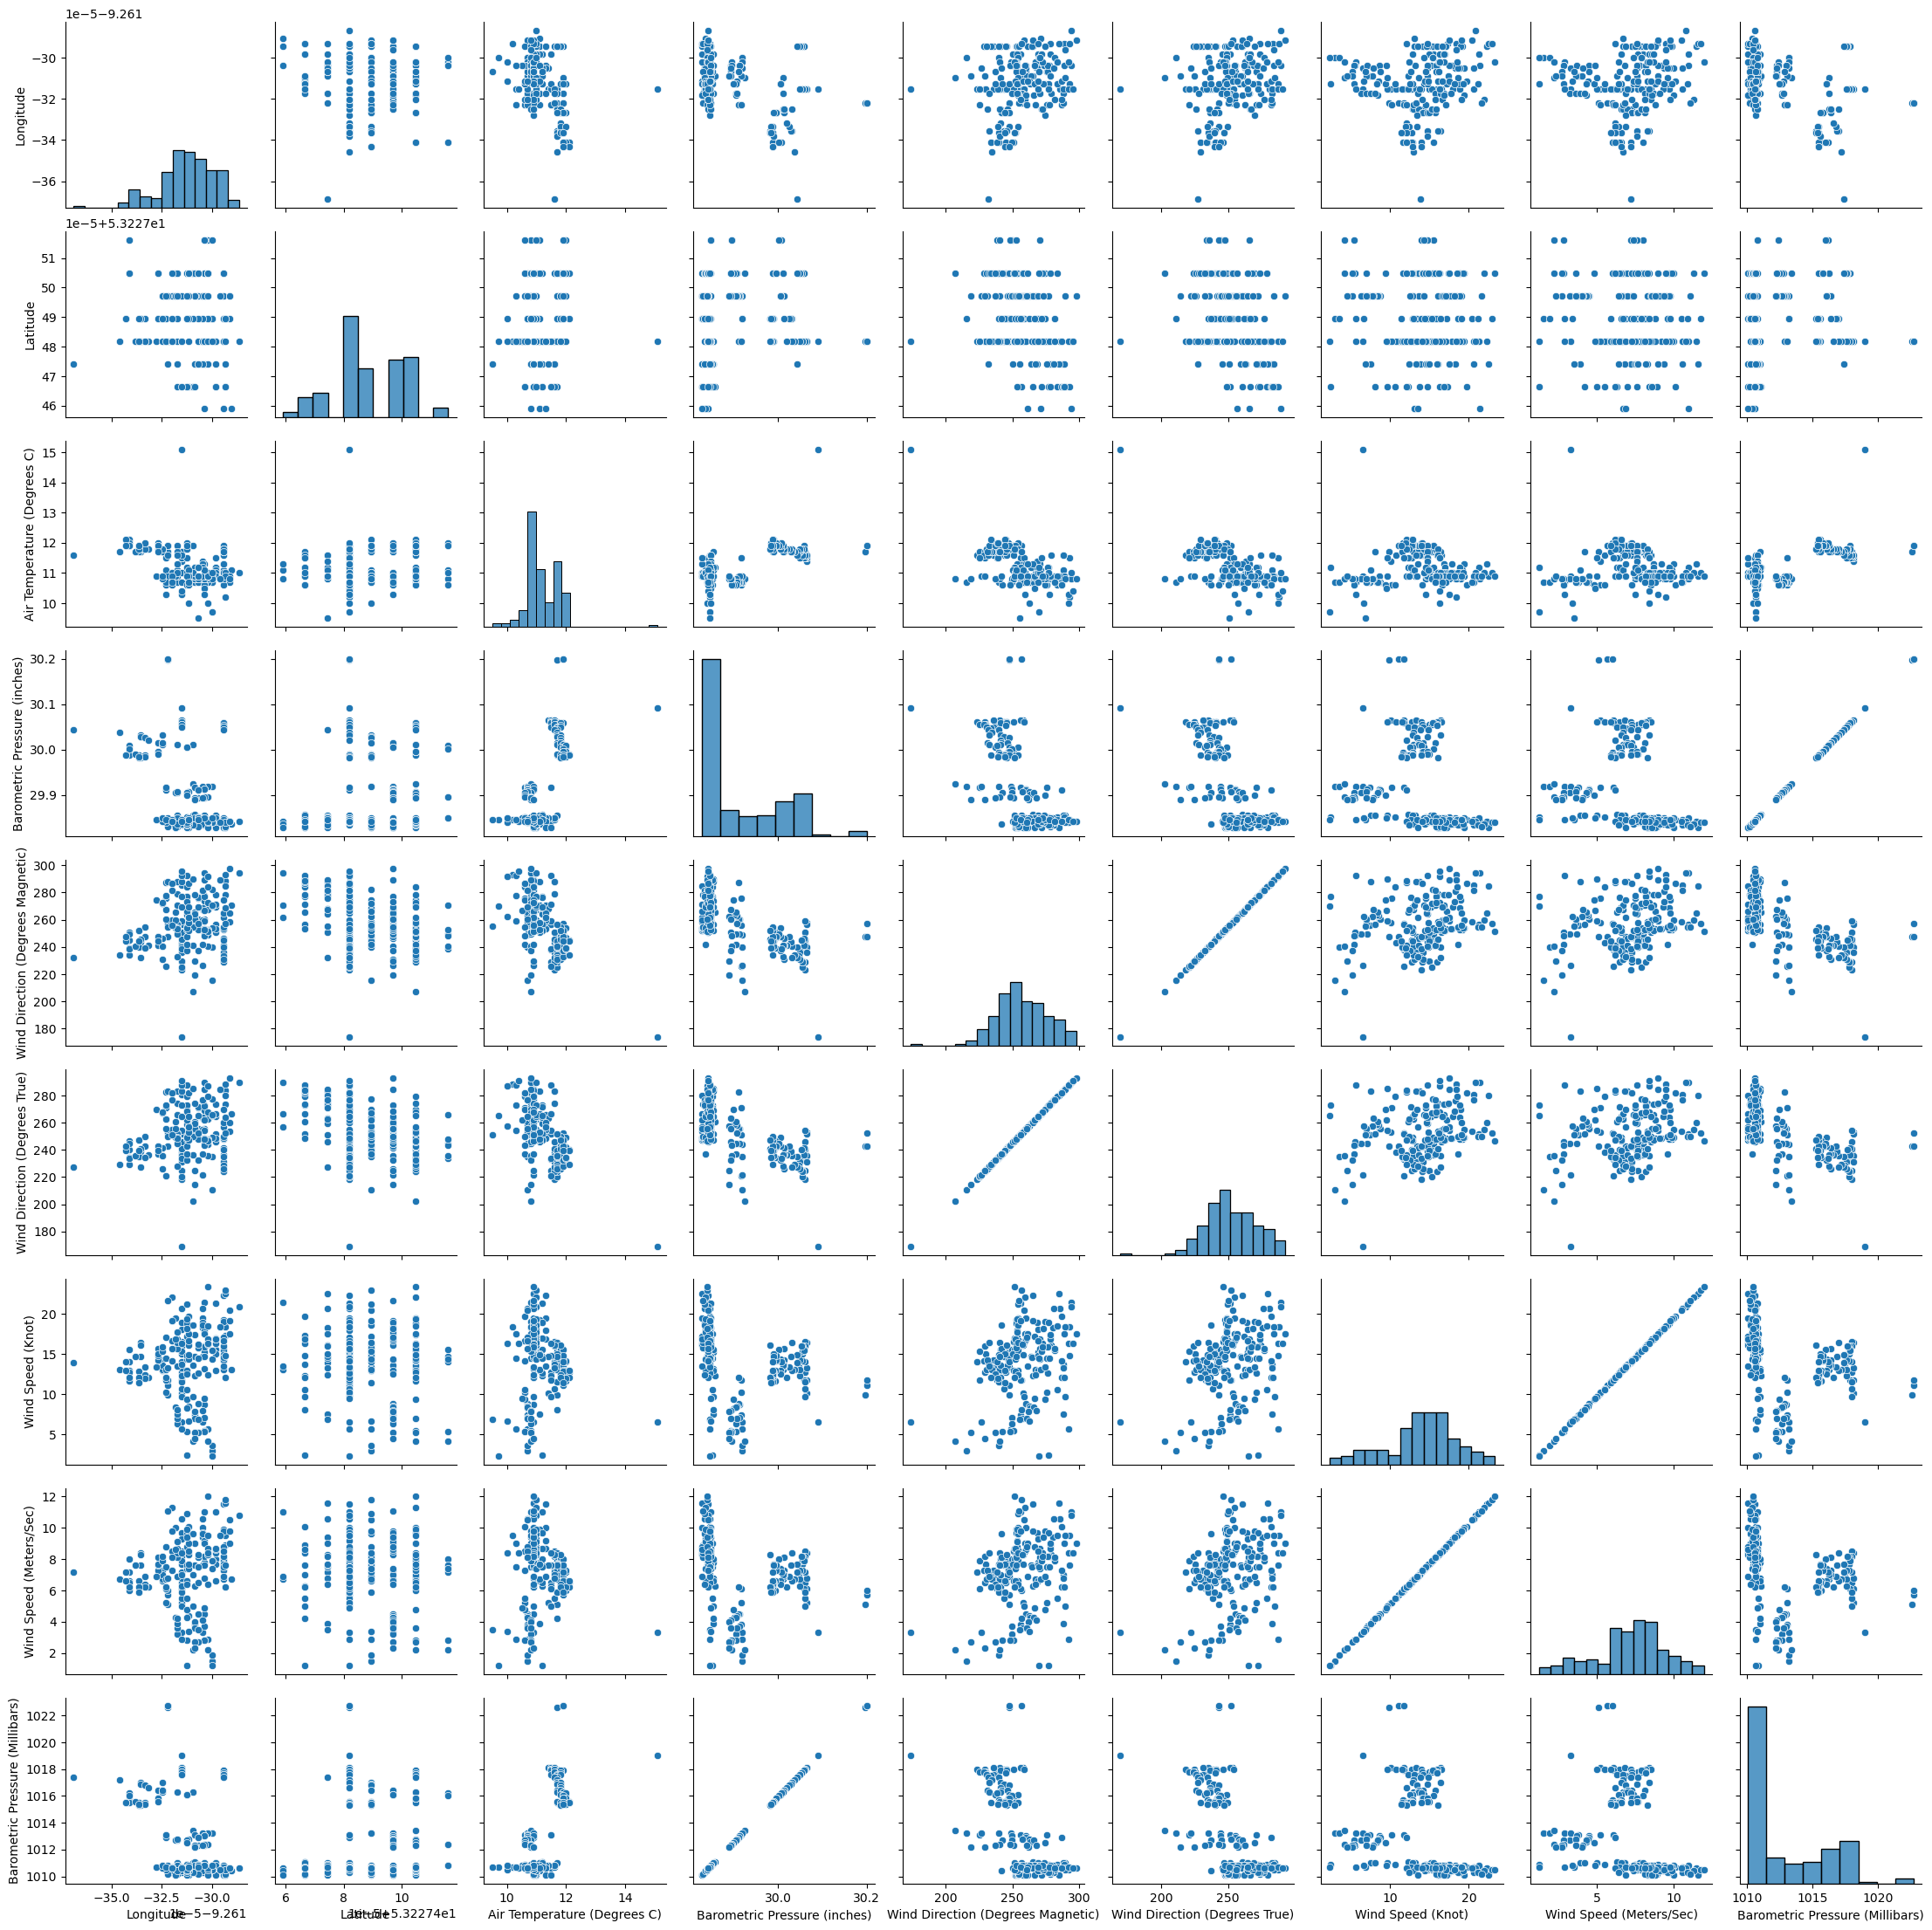

In [10]:
sns.pairplot(df1)

In [11]:
df1

,SensorTimestamp,Longitude,Latitude,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Direction (Degrees True),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars),datetime
0,11/08/2015 14:54:33,-9.261322,53.227482,11.7,30.1974,247.8,243.0,9.9,5.1,1022.6,2015-11-08 14:54:33
1,11/08/2015 14:54:42,-9.261322,53.227482,11.9,30.2003,247.8,243.0,11.1,5.7,1022.7,2015-11-08 14:54:42
2,11/08/2015 14:56:59,-9.261322,53.227482,11.9,30.2003,257.1,252.3,11.7,6.0,1022.7,2015-11-08 14:56:59
3,13/08/2015 10:50:11,-9.261315,53.227482,15.1,30.0911,173.7,168.9,6.5,3.3,1019.0,2015-08-13 10:50:11
4,13/08/2015 12:02:42,-9.261315,53.227482,11.4,30.0645,258.1,253.3,10.1,5.2,1018.1,2015-08-13 12:02:42
...,...,...,...,...,...,...,...,...,...,...,...
195,14/08/2015 18:06:49,-9.261315,53.227482,10.3,29.8460,292.5,287.7,5.7,2.9,1010.7,2015-08-14 18:06:49
196,14/08/2015 18:11:49,-9.261315,53.227482,10.4,29.8430,295.6,290.8,16.3,8.4,1010.6,2015-08-14 18:11:49
197,14/08/2015 18:16:50,-9.261323,53.227482,10.3,29.8460,277.8,273.0,14.5,7.5,1010.7,2015-08-14 18:16:50
198,14/08/2015 18:21:50,-9.261320,53.227482,10.6,29.8430,286.9,282.1,14.1,7.3,1010.6,2015-08-14 18:21:50


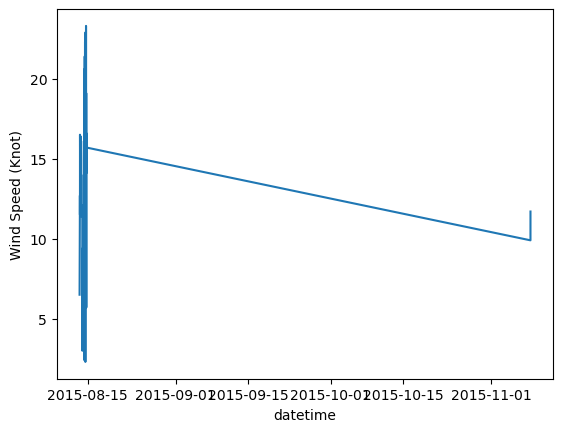

In [25]:
sns.lineplot(data=df1, x = "datetime", y = "Wind Speed (Knot)")
#sns.lineplot(data=df1, x = "datetime", y = "Wind Speed (Meters/Sec)")
plt.show()

In [111]:
df1.hist(x ='datetime', y ='Wind Speed (Meters/Sec)')
#plt.show()
#hist = df1.hist
#plt.show()


#df1.hist(df1['Air Temperature (Degrees C)'],bins = 10)

TypeError: hist() got multiple values for argument 'x'

In [ ]:
idx = pd.date_range(start = "2015-11-08 14:54:33", periods=100, freq="MIN")
idx

DatetimeIndex(['2015-11-08 14:54:33', '2015-11-08 14:55:33',
               '2015-11-08 14:56:33', '2015-11-08 14:57:33',
               '2015-11-08 14:58:33', '2015-11-08 14:59:33',
               '2015-11-08 15:00:33', '2015-11-08 15:01:33',
               '2015-11-08 15:02:33', '2015-11-08 15:03:33',
               '2015-11-08 15:04:33', '2015-11-08 15:05:33',
               '2015-11-08 15:06:33', '2015-11-08 15:07:33',
               '2015-11-08 15:08:33', '2015-11-08 15:09:33',
               '2015-11-08 15:10:33', '2015-11-08 15:11:33',
               '2015-11-08 15:12:33', '2015-11-08 15:13:33',
               '2015-11-08 15:14:33', '2015-11-08 15:15:33',
               '2015-11-08 15:16:33', '2015-11-08 15:17:33',
               '2015-11-08 15:18:33', '2015-11-08 15:19:33',
               '2015-11-08 15:20:33', '2015-11-08 15:21:33',
               '2015-11-08 15:22:33', '2015-11-08 15:23:33',
               '2015-11-08 15:24:33', '2015-11-08 15:25:33',
               '2015-11-

In [ ]:
rng = np.random.default_rng()
ts = pd.DataFrame(data=rng.poisson(200,len(idx)),index =idx, columns=['Synthesised Wind Speed (Meters/Sec)'])
ts

,Synthesised Wind Speed (Meters/Sec)
2015-11-08 14:54:33,219
2015-11-08 14:55:33,218
2015-11-08 14:56:33,178
2015-11-08 14:57:33,179
2015-11-08 14:58:33,210
...,...
2015-11-08 16:29:33,193
2015-11-08 16:30:33,198
2015-11-08 16:31:33,165
2015-11-08 16:32:33,199


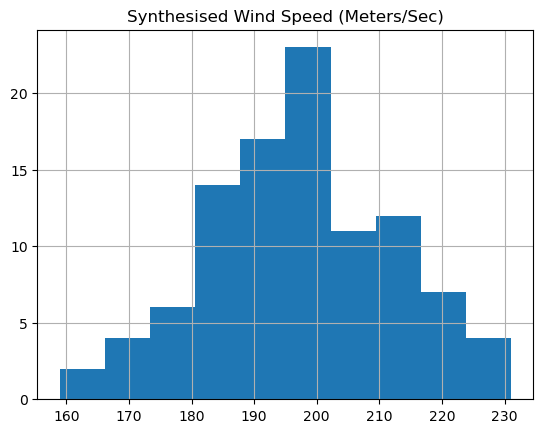

In [ ]:
ts.hist()
plt.show()

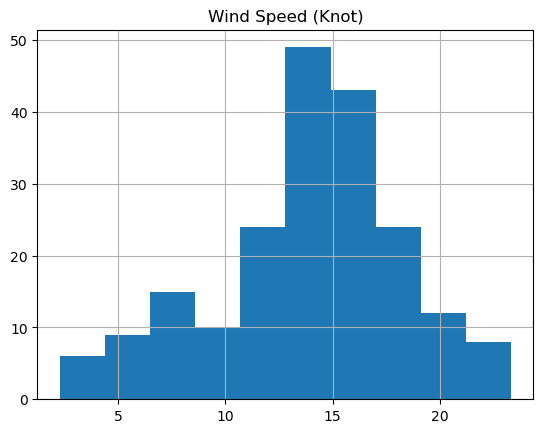

In [ ]:
df1.hist('Wind Speed (Knot)')
plt.show()

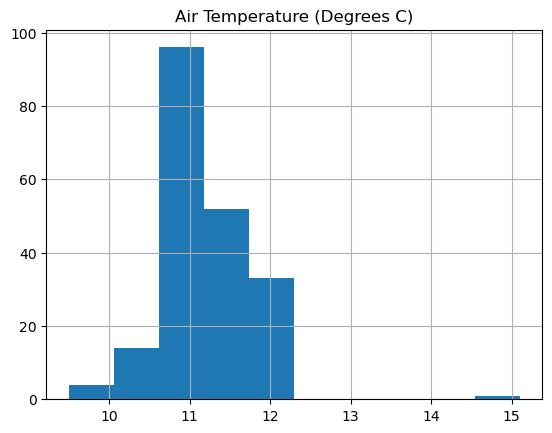

In [ ]:
df1.hist('Air Temperature (Degrees C)')
plt.show()

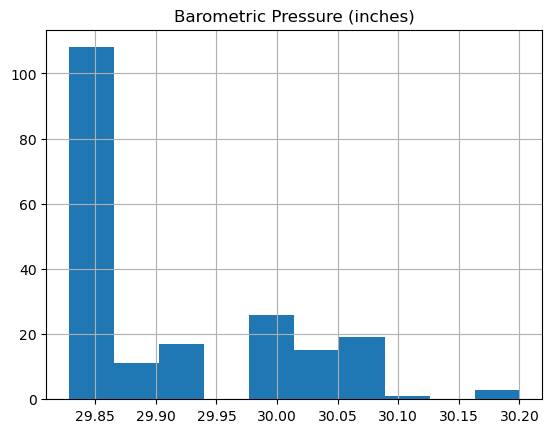

In [ ]:
df1.hist('Barometric Pressure (inches)')
plt.show()

In [ ]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

In [ ]:
rng = np.random.default_rng()



generate random numbers between 0 and 1 , averafe of 25 recoded incidnets per day

In [ ]:
ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded']), 
#ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded1'])
#ts1 = pd.DataFrame(data=rng.binomial(p = .75,len(idx)),index =idx, columns=['Incidents recorded1'])

In [ ]:
ts


(            Incidents recorded
 2018-12-31                  25
 2019-12-31                  29
 2020-12-31                  30
 2021-12-31                  26
 2022-12-31                  23
 ...                        ...
 2113-12-31                  10
 2114-12-31                  30
 2115-12-31                  22
 2116-12-31                  22
 2117-12-31                  21
 
 [100 rows x 1 columns],)

In [ ]:
ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded1'])
  # number of trials, probability of each trial
#s = np.random.binomial(n, p, 10)
ts

,Incidents recorded1
2018-12-31,25
2019-12-31,28
2020-12-31,24
2021-12-31,20
2022-12-31,32
...,...
2113-12-31,30
2114-12-31,20
2115-12-31,27
2116-12-31,13
